In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from wordcloud import WordCloud


In [2]:
#pip install ipython-autotime

In [153]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 793 µs (started: 2022-02-15 14:20:30 +05:30)


In [4]:
#pip install sentence-transformers

time: 77.6 ms (started: 2022-02-15 12:25:36 +05:30)


In [3]:
data= pd.read_csv('The-Office-Lines-V2.csv')
data.head()

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."


In [5]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would",  "i'd": "I would","I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have","i'm": "I am","i've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [6]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [77]:
data.replace(' ', np.nan, inplace=True)

time: 1.56 ms (started: 2022-02-15 13:10:54 +05:30)


In [84]:
data.isnull().sum()

season         0
episode        0
title          0
scene          0
speaker        0
line           0
lower_lines    0
Top_Words      0
dtype: int64

time: 17.8 ms (started: 2022-02-15 13:13:59 +05:30)


In [7]:
data=data.dropna(how='any', axis=0)

In [8]:
data['lower_lines']=data['line'].apply(lambda a: str(a).lower())
data['clean_lines']=data['lower_lines'].apply(lambda x:expand_contractions(x))
data.head()

,season,episode,title,scene,speaker,line,lower_lines,clean_lines
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim. your quarterlies look very good...,all right jim. your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...","oh, i told you. i couldn't close it. so...","oh, i told you. i could not close it. so..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you've come to the master for guidance? is ...,so you have come to the master for guidance? i...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.","actually, you called me in here, but yeah.","actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.","all right. well, let me show you how it's done.","all right. well, let me show you how it is done."


In [9]:
def remove_punctuations(text):
    nopunctuation="".join([i for i in text if i not in string.punctuation])
    return nopunctuation
data['clean_lines']= data['clean_lines'].apply(lambda x:remove_punctuations(x))
data['lower_lines']=data['clean_lines'].apply(lambda a: a.lower())
data=data.drop('clean_lines',axis=1)
data.head()


,season,episode,title,scene,speaker,line,lower_lines
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim your quarterlies look very good ...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",oh i told you i could not close it so
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you have come to the master for guidance is...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",actually you called me in here but yeah
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",all right well let me show you how it is done


In [10]:
#def tokenization(text):
    #tokens=re.findall("[\w']+", text)
    #return tokens
#data['msg_tokenized']= data['lower_lines'].apply(lambda x: tokenization(x))
#data.head()
#data.drop('tokenized_lines',axis=1)

In [11]:
#stopwords = nltk.corpus.stopwords.words('english')
#stopwords[0:20]
#from nltk.corpus import stopwords
#set(stopwords.words('english'))

time: 65.7 ms (started: 2022-02-15 12:25:36 +05:30)


In [12]:
#def remove_stopwords(text):
 #   nostop= [i for i in text if i not in stopwords]
  #  return nostop

time: 88 ms (started: 2022-02-15 12:25:36 +05:30)


In [13]:
#data['no_stopwords']= data['msg_tokenized'].apply(lambda x:remove_stopwords(x))
#data.head()


time: 81.6 ms (started: 2022-02-15 12:25:36 +05:30)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(stop_words='english')
tfvectorizer.fit(data['lower_lines'])
tfvectorizer.vocabulary_


{'right': 14854,
 'jim': 9548,
 'quarterlies': 14047,
 'look': 10475,
 'good': 7610,
 'things': 17859,
 'library': 10256,
 'oh': 12234,
 'told': 18096,
 'close': 3586,
 'come': 3767,
 'master': 10860,
 'guidance': 7890,
 'saying': 15334,
 'grasshopper': 7732,
 'actually': 499,
 'called': 2808,
 'yeah': 19918,
 'let': 10219,
 'yes': 19963,
 'like': 10301,
 'speak': 16581,
 'office': 12217,
 'manager': 10726,
 'hello': 8295,
 'michael': 11140,
 'scott': 15437,
 'regional': 14466,
 'dunder': 5695,
 'mifflin': 11187,
 'paper': 12711,
 'products': 13776,
 'just': 9683,
 'wanted': 19258,
 'talk': 17530,
 'manageramanger': 10727,
 'deal': 4747,
 'thank': 17786,
 'sir': 16057,
 'gentleman': 7435,
 'scholar': 15388,
 'sorry': 16505,
 'ok': 12266,
 'mistake': 11324,
 'woman': 19715,
 'talking': 17534,
 'low': 10542,
 'voice': 19139,
 'probably': 13748,
 'smoker': 16300,
 'way': 19347,
 'uh': 18557,
 '12': 34,
 'years': 19933,
 'want': 19256,
 'entire': 6091,
 'floor': 6916,
 'kingdom': 9836,
 'f

In [13]:
vc = tfvectorizer.fit_transform(data['lower_lines'][:500])
#vc_norm=normalize(vc)
vector_spaces=vc.toarray()
vector_spaces

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
df=pd.DataFrame(data=vector_spaces, columns=tfvectorizer.get_feature_names())

print("{} rows".format(df.shape[0]))
print(df.T.nlargest(5,0))
print(df.shape)

df




500 rows
                  0    1    2    3    4    5    6    7    8    9    ...  490  \
library      0.469506  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
quarterlies  0.469506  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
things       0.403559  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
jim          0.346812  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
look         0.346812  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   

             491  492  493  494  495  496  497  498  499  
library      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
quarterlies  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
things       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
jim          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
look         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 500 columns]
(500, 1048)


/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,100,12,1200,17,25,280z,50,78,99,abandoned,...,wwhat,xd,yeah,year,years,yes,yesterday,yogurt,young,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.412049,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [16]:
k=5
kmeans_results = run_KMeans(k,df)

In [19]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tfvectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df2 = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df2)
    return dfs

time: 870 µs (started: 2022-02-15 12:25:39 +05:30)


In [23]:
df_array = df.to_numpy()
print(df_array)
prediction = kmeans.predict(df)
n_feats = 20
dfs = get_top_features_cluster(df_array, prediction, n_feats)
dfs

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


NameError: name 'kmeans' is not defined

time: 9.91 ms (started: 2022-02-15 12:27:18 +05:30)


In [ ]:
#pip install KMeans



In [ ]:
def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sb.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [ ]:
dfs

In [ ]:
plotWords(dfs, 50)

In [31]:
import sys
wcss = []
for i in range(1, 200,5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(cluster_dataset)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()




NameError: name 'cluster_dataset' is not defined

time: 8.89 ms (started: 2022-02-15 12:38:45 +05:30)


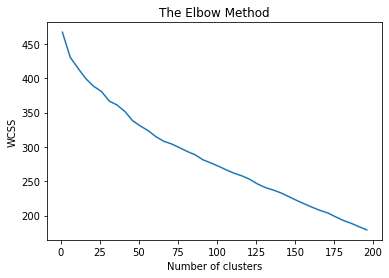

time: 103 ms (started: 2022-02-15 12:38:22 +05:30)


In [30]:
plt.plot(range(1, 200,5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = df.columns
generateWordClouds(centroids)

# PCA

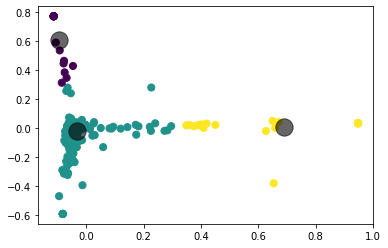

In [54]:
from sklearn.cluster import KMeans
n_clusters = 3
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(vector_spaces)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [55]:
number_clusters = range(1, 8)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score



[-26.07390300034361,
 -13.567694934656375,
 -7.398542730948933,
 -4.587419742412053,
 -2.7833770232326356,
 -1.9965941427696106,
 -1.4032559231873631]

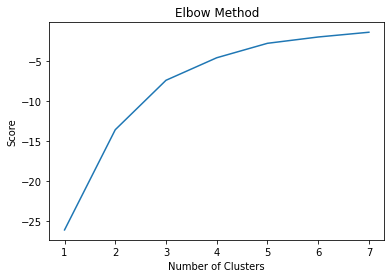

In [56]:
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

# GloVe

In [17]:
def get_non_glove_words(dataframe, column, model):

    # Unique Words
    counts = dataframe[column].str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts')
    
    # Extracting Glove Words and Non Glove Words
    non_glove_words = []
    glove_words = []
    for i in counts['unique_words']:
        try:
            model.get_vector(i)
        except KeyError:
            non_glove_words.append(i)
        else:
            glove_words.append(i)
    
    #Non-Glove words
    non_glove_words_df = pd.DataFrame({'unique_non_glove_words':non_glove_words})
    non_glove_words_df = pd.merge(non_glove_words_df,counts,how='left',left_on=['unique_non_glove_words'],right_on=['unique_words']).iloc[:,[0,2]]
    non_glove_words_df['cum_perc'] = round(100*non_glove_words_df["counts"].cumsum()/non_glove_words_df["counts"].sum(),2)
    
    print('Done')
    
    return(non_glove_words_df)


In [34]:
#pip install gensim

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 24.1 MB 3.7 MB/s            
     |████████████████████████████████| 58 kB 606 kB/s             
You should consider upgrading via the '/home/diyapancholi/Projects/my_projects/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
time: 8.48 s (started: 2022-02-15 12:39:20 +05:30)


In [19]:
import gensim
from gensim.models import KeyedVectors
filename = 'glove.6B.100d.txt'
gmodel=KeyedVectors.load_word2vec_format(filename, binary=False)
non_glove_words_df=get_non_glove_words(dataframe=data, column='lower_lines', model=gmodel)
print(len(non_glove_words_df))

Done
7183


In [27]:
non_glove_words_df

,unique_non_glove_words,counts,cum_perc
0,whoa,271,1.77
1,dunder,252,3.42
2,schrute,177,4.58
3,hmm,176,5.73
4,nope,171,6.85
...,...,...,...
7178,spaceman,1,99.97
7179,611,1,99.98
7180,gayer,1,99.99
7181,sebaceous,1,99.99


In [30]:
import sys
def extract_vectors(dataframe, column, method, non_glove_words_df, n=3):
    if method=="first_n_words":
        #Approach: First n words
        #Add 'blank' to words less than n
        dataframe['Length_Glove_Words'] = dataframe[column].str.split().str.len()
        def blank_words (row, n):
            for i in range(1,n+1) :
                if row['Length_Glove_Words'] == i :
                    return ' blank ' * (n-i)
        dataframe['Words'] = dataframe.apply(lambda row: blank_words(row,n),axis=1)
        dataframe['Top_Words'] = dataframe[column].fillna('') + dataframe['Words'].fillna('')
        dataframe.drop(['Length_Glove_Words','Words'], axis=1, inplace=True)
        #Select First n Words
        dataframe['Top_Words'] = dataframe['Top_Words'].str.split().str[0:n].str.join(' ')
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe['Top_Words'].apply(lambda x: any([k in x for k in non_glove]))]
        #print(dataframe.isnull().sum())
        dataframe.Top_Words.replace('', np.nan, inplace=True)
        dataframe.dropna(subset=['Top_Words'], inplace=True)
        print(dataframe)
        #Add Glove embeddings
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        
        while("" in unique) :
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
        #Glove vectors for top 3 words        
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            df = []
            for i in range(0,n):
                df = np.append(df,unique_word_vec[row.Top_Words.split(' ')[i]])            
            #df = np.append(df,unique_word_vec[row.Top_Words])
            stack.extend(np.vstack(df).T)
            if j==length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j%100==0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j+=1
        del unique_word_vec
        stack=pd.DataFrame(stack)
        cluster_dataset = dataframe[["Top_Words"]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    
    elif method == "sum_word_vectors":        
        #Approach: Sum of d word vectors for n words
        
        #dataframe[column] = dataframe[column].apply(lambda x: str(x).replace(u'\xa0', u''))
        dataframe[column]=dataframe[column].str.split().str.join(' ')
        non_glove=list(non_glove_words_df['unique_non_glove_words'].unique())
        dataframe=dataframe[~dataframe[column].apply(lambda x: any([k in x for k in non_glove]))]
        dataframe[column].replace('', np.nan, inplace=True)
        dataframe.dropna(subset=[column], inplace=True)
        print(dataframe)
        #Add Glove embeddings
        gloveFile = "glove.6B.100.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3,error_bad_lines=False)
        
        # Unique words
        unique = list(dataframe[column].str.split(' ', expand=True).stack().unique())
        #unique.remove("\xa0pretty")
        #unique.remove("\xa0and")
        while("" in unique):
            unique.remove("")
        #print(unique)
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        #print(unique_word_vec)
        del Glovewords,unique
      
        
        #Sum of Glove vectors for n words
        from operator import add
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            sum_word_vec = [0]*100
            for word in row[column].split(' '):
                word_vec = unique_word_vec[word]
                sum_word_vec = list(map(add, sum_word_vec, word_vec))
            stack.extend([sum_word_vec])
            if j==length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j%100==0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j+=1
        del unique_word_vec
        stack=pd.DataFrame(stack)
        
        cluster_dataset = dataframe[[column]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset




In [31]:
#Extracting glove vectors
cluster_dataset = extract_vectors(data,column='lower_lines',method='first_n_words',non_glove_words_df=non_glove_words_df,n=3)


/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


       season  episode   title  scene  speaker  \
2           1        1   Pilot      1  Michael   
6           1        1   Pilot      3  Michael   
8           1        1   Pilot      3  Michael   
12          1        1   Pilot      3  Michael   
13          1        1   Pilot      3      Pam   
...       ...      ...     ...    ...      ...   
54153       9       24  Finale   7968    Kevin   
54158       9       24  Finale   7968    Oscar   
54159       9       24  Finale   7969    Creed   
54162       9       24  Finale   7972    Creed   
54165       9       24  Finale   7975      Jim   

                                                    line  \
2      So you've come to the master for guidance? Is ...   
6      I've, uh, I've been at Dunder Mifflin for 12 y...   
8      If you think she's cute now, you should have s...   
12     Oh! Pam, this is from Corporate. How many time...   
13                                  You haven't told me.   
...                                    

In [173]:
cluster_dataset.loc[cluster_dataset['Top_Words'].str.split()==' blank']

,Top_Words,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299


time: 30.7 ms (started: 2022-02-15 14:24:39 +05:30)


In [29]:
cluster_dataset1 = extract_vectors(data,column='lower_lines',method='sum_word_vectors',non_glove_words_df=non_glove_words_df)


/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/home/rutvathaker/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/tmp/ipykernel_15639/3087560777.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  cluster_dataset1 = extract_vectors(data,column='lower_lines',method='sum_word_vectors',non_glove_words_df=non_glove_words_df)


       season  episode   title  scene  speaker  \
32          1        1   Pilot     10  Michael   
34          1        1   Pilot     10  Michael   
44          1        1   Pilot     10  Michael   
54          1        1   Pilot     11      Jan   
70          1        1   Pilot     15      Jim   
...       ...      ...     ...    ...      ...   
54150       9       24  Finale   7967    Creed   
54151       9       24  Finale   7967   Angela   
54152       9       24  Finale   7967    Creed   
54153       9       24  Finale   7968    Kevin   
54158       9       24  Finale   7968    Oscar   

                                           line  \
32                   Um... Me no get an agenda.   
34                     I didn't get any agenda.   
44                                        OK...   
54                                    Go ahead.   
70                                         Yes?   
...                                         ...   
54150          I still have my medal from 

In [92]:
cluster_dataset1

,lower_lines,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,what,-0.151800,0.384090,0.893400,-0.424210,-0.921610,0.037988,-0.320260,0.003412,0.221010,...,0.274270,-0.218980,-0.267140,0.002256,-0.501780,-0.327750,-0.456700,-0.271230,0.221570,0.921120
1,any messages,-0.159692,0.075406,0.229206,-0.944710,0.463030,1.398340,-0.450894,-1.097480,0.948820,...,-1.126610,0.935241,0.176570,-0.351519,-0.568550,-0.539860,-0.799060,-0.444790,0.765095,0.810430
2,you have not told me,-0.840941,0.706120,2.370215,-2.983490,-2.361720,1.238044,-0.757377,1.880310,1.390800,...,0.056230,-1.910643,0.942820,-1.060640,-2.724010,0.200718,-0.914510,-1.584728,1.361552,2.719020
3,what,-0.151800,0.384090,0.893400,-0.424210,-0.921610,0.037988,-0.320260,0.003412,0.221010,...,0.274270,-0.218980,-0.267140,0.002256,-0.501780,-0.327750,-0.456700,-0.271230,0.221570,0.921120
4,ok all right see you later,-0.914443,1.775780,3.400160,-2.767802,-2.688330,1.936380,-1.441862,1.236010,0.715956,...,-1.268495,-1.736899,-0.389902,0.458210,-3.860659,-0.480725,-0.432864,-1.667360,1.872963,1.174268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4455,and it is all inclusive,-2.042383,2.111790,2.417981,-1.431670,0.409920,1.892850,-0.321000,1.965110,0.162479,...,-1.152043,-0.981603,-1.832970,0.605260,-2.461291,0.519437,-1.351819,-3.128650,3.030510,2.591550
4456,michael,0.296970,0.133390,0.190500,-0.871290,0.109390,0.060327,-0.037184,-0.399650,-0.992360,...,0.004928,-0.411880,0.326230,0.802050,0.182300,0.668810,0.623570,-0.066501,-0.515160,-0.312120
4457,yes,-0.050131,0.663560,0.843150,-0.752950,-0.428480,0.161000,-0.036730,0.074777,0.352510,...,-0.042350,-0.334790,0.243310,0.576450,-0.497790,0.072397,-0.263010,0.164890,0.048798,0.503590
4458,i am sorry,-0.374589,0.863799,1.689560,-1.161713,-3.788500,1.689360,-0.365183,1.121280,1.066200,...,-0.173275,0.242310,1.618280,1.188085,-1.085598,0.287892,-0.399043,-1.114360,-0.085532,0.887747


time: 20.8 ms (started: 2022-02-15 13:16:17 +05:30)


In [32]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(cluster_dataset.iloc[:, 1:])


In [33]:
wcss = []
for i in range(1, 52, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 51

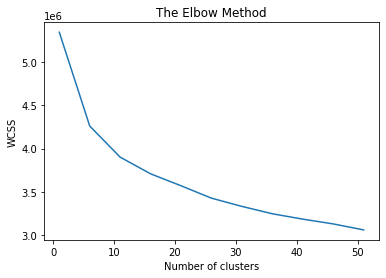

In [34]:
plt.plot(range(1, 52, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

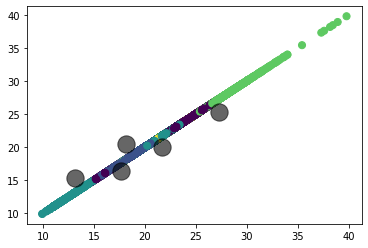

In [77]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)


plt.scatter(y_kmeans[:, 0], y_kmeans[:, 0],c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 2], centers2[:, 3],c='black', s=300, alpha=0.6)

In [76]:
y_kmeans[:, 0]

array([19.59998149, 28.32109873, 19.48037262, ..., 21.96649177,
       20.2238163 , 24.71444429])

In [62]:
y_kmeans.shape

(17812, 5)

In [64]:
fitted

KMeans(n_clusters=5, random_state=42)

In [68]:
prediction

array([1, 3, 1, ..., 2, 2, 0], dtype=int32)

In [36]:
labels = kmeans.labels_ 
cluster_dataset['label'] = labels
cluster_dataset=cluster_dataset.loc[:,['Top_Words','label']]
cluster_dataset


,Top_Words,label
0,so you have,1
1,i have uh,3
2,if you think,1
3,oh pam this,0
4,you have not,1
...,...,...
17807,oscar oscar i,3
17808,you are not,1
17809,and all the,2
17810,it all seems,2


In [38]:
cluster_dataset=cluster_dataset.sort_values('label')
cluster_dataset.to_csv('cluster_first_n_words.csv', index=False)
#cluster_dataset[cluster_dataset.Top_Words==' blank']

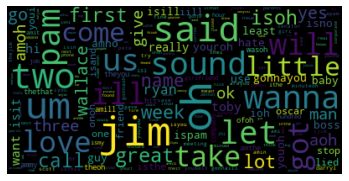

In [39]:
word="".join(line for line in cluster_dataset[cluster_dataset['label']==0].Top_Words.values)
WC = WordCloud(max_font_size=50, background_color="Black").generate(str(word))
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

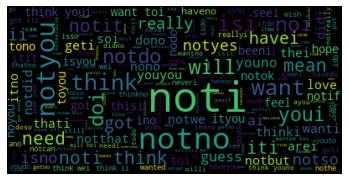

In [40]:
word="".join(line for line in cluster_dataset[cluster_dataset['label']==1].Top_Words.values)
WC = WordCloud(max_font_size=50, background_color="Black").generate(str(word))
            
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()
     

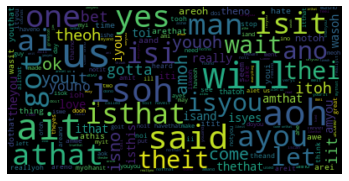

In [41]:
word="".join(line for line in cluster_dataset[cluster_dataset['label']==2].Top_Words.values)
WC = WordCloud(max_font_size=50, background_color="Black").generate(str(word))
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

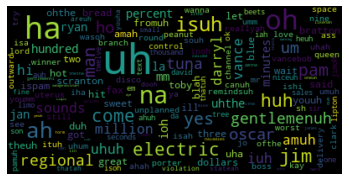

In [42]:
word="".join(line for line in cluster_dataset[cluster_dataset['label']==3].Top_Words.values)
WC = WordCloud(max_font_size=50, background_color="Black").generate(str(word))
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

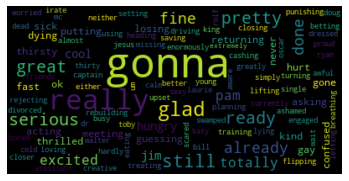

In [43]:
word=" ".join(line for line in cluster_dataset[cluster_dataset['label']==4].Top_Words.values)
WC = WordCloud(max_font_size=50, background_color="Black").generate(str(word))
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

In [45]:
#from heapq import nlargest
from operator import itemgetter

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rutvathaker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
stopwords = nltk.corpus.stopwords.words('english')

In [48]:
def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

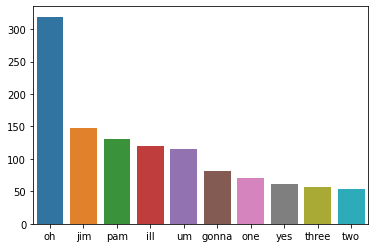

In [49]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['label']==0].Top_Words).split()

top_words=remove_stopwords(top_words)

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
TW

#TW= nlargest(10,count,key=count.get)

sb.barplot(list(TW.keys()), list(TW.values()))

    
    


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

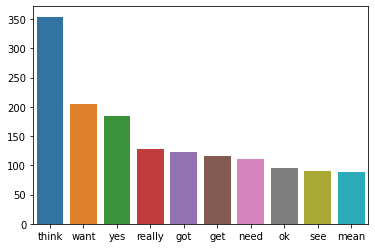

In [50]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['label']==1].Top_Words).split()
top_words=remove_stopwords(top_words)

count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
TW

#TW= nlargest(10,count,key=count.get)

sb.barplot(list(TW.keys()), list(TW.values()))


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

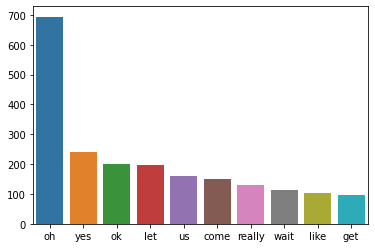

In [51]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['label']==2].Top_Words).split()
top_words=remove_stopwords(top_words)
count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
TW

#TW= nlargest(10,count,key=count.get)

sb.barplot(list(TW.keys()), list(TW.values()))


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

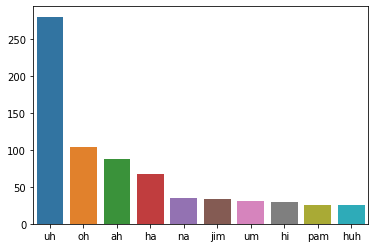

In [52]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['label']==3].Top_Words).split()
top_words=remove_stopwords(top_words)
count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
TW

#TW= nlargest(10,count,key=count.get)

sb.barplot(list(TW.keys()), list(TW.values()))


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

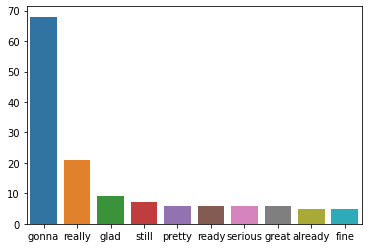

In [53]:
top_words=[]
top_words= " ".join(cluster_dataset[cluster_dataset['label']==4].Top_Words).split()
top_words=remove_stopwords(top_words)
count={}
for word in top_words:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

TW= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])
TW

#TW= nlargest(10,count,key=count.get)

sb.barplot(list(TW.keys()), list(TW.values()))


## Sum word vectors

In [ ]:
sc1_x=StandardScaler()
X1_train=sc1_x.fit_transform(cluster_dataset1.iloc[:, 1:])

In [ ]:
wcss = []
for i in range(1, 52, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1_train)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

In [ ]:
plt.plot(range(1, 53, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)


plt.scatter(y_kmeans[:, 0], y_kmeans[:, 1],c=prediction,s=50 , cmap='viridis')

centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6)

In [ ]:
labels = kmeans.labels_ 
cluster_dataset1['label'] = labels